In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
!pip install koreanize-matplotlib

import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip",
    encoding="cp949")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 23.7 MB/s eta 0:00:00


In [ ]:
#@title Q1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  2772 non-null   object
 1   상품군별     2772 non-null   object
 2   판매유형별    2772 non-null   object
 3   시점       2772 non-null   object
 4   데이터      2772 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 108.4+ KB


In [ ]:
df.head(5)

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


In [ ]:
df.describe()

,데이터
count,2772.000000
mean,1613.116522
std,4273.426107
min,-10003.000000
25%,41.750000
50%,291.500000
75%,1181.000000
max,47689.000000


In [ ]:
'''
오늘 활용할 데이터는 2022년까지의 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액 입니다. 합계, 계 데이터는 제외하였으며 판매유형별 데이터에도 면세점 데이터는 제외하고 다운로드 받은 데이터 입니다. 해당 데이터를 통해 온라인쇼핑을 통한 해외직접판매액에 대한 분석을 진행해 주세요!
[원본데이터] 국가통계포털 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE
'''

'\n오늘 활용할 데이터는 2022년까지의 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액 입니다. 합계, 계 데이터는 제외하였으며 판매유형별 데이터에도 면세점 데이터는 제외하고 다운로드 받은 데이터 입니다. 해당 데이터를 통해 온라인쇼핑을 통한 해외직접판매액에 대한 분석을 진행해 주세요!\n[원본데이터] 국가통계포털 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE\n'

In [ ]:
df.describe(include="object")
df["판매유형별"].value_counts()

면세점 이외    2772
Name: 판매유형별, dtype: int64

In [ ]:
df['연도'] = df['시점'].apply(lambda x: x.split('.')[0])
df['분기'] = df['시점'].apply(lambda x: x.split('.')[1][:1])

df['연도'] = df['연도'].astype(int)
df['분기'] = df['분기'].astype(int)

In [ ]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1


In [ ]:
stats = df[['데이터','연도','분기']].describe()
stats

,데이터,연도,분기
count,2772.000000,2772.000000,2772.000000
mean,1613.116522,2019.272727,2.409091
std,4273.426107,1.600909,1.114533
min,-10003.000000,2017.000000,1.000000
25%,41.750000,2018.000000,1.000000
50%,291.500000,2019.000000,2.000000
75%,1181.000000,2021.000000,3.000000
max,47689.000000,2022.000000,4.000000


In [ ]:
stats.columns = ['백만','연도','분기']
stats

,백만,연도,분기
count,2772.000000,2772.000000,2772.000000
mean,1613.116522,2019.272727,2.409091
std,4273.426107,1.600909,1.114533
min,-10003.000000,2017.000000,1.000000
25%,41.750000,2018.000000,1.000000
50%,291.500000,2019.000000,2.000000
75%,1181.000000,2021.000000,3.000000
max,47689.000000,2022.000000,4.000000


In [ ]:
# 연도, 시계열 데이터를 볼 수 있으며, 판매액인데 min이 마이너스가 있다는건 데이터가 잘못된게 있거나 적자의경우를 나타내기 위해 일부러 -를 달았을 수도 있음
stats['연도'] = stats['연도'].astype(int)
stats['분기'] = stats['분기'].astype(int)
stats['백만'] = stats['백만'].apply(lambda x: format(x,'.2f'))
stats

,백만,연도,분기
count,2772.00,2772,2772
mean,1613.12,2019,2
std,4273.43,1,1
min,-10003.00,2017,1
25%,41.75,2018,1
50%,291.50,2019,2
75%,1181.00,2021,3
max,47689.00,2022,4


In [ ]:
#@title Q2

In [ ]:
pt = pd.pivot_table(df, index='국가(대륙)별',columns='연도',values='데이터',aggfunc='sum')

In [ ]:
pt

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


In [ ]:
import seaborn as sns

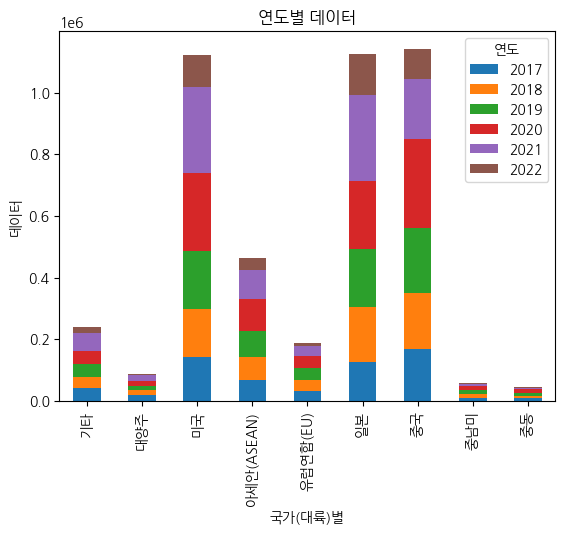

In [ ]:
pt.plot(kind='bar', stacked=True)
plt.title('연도별 데이터')
plt.xlabel('국가(대륙)별')
plt.ylabel('데이터')
plt.legend(title='연도')
plt.show()

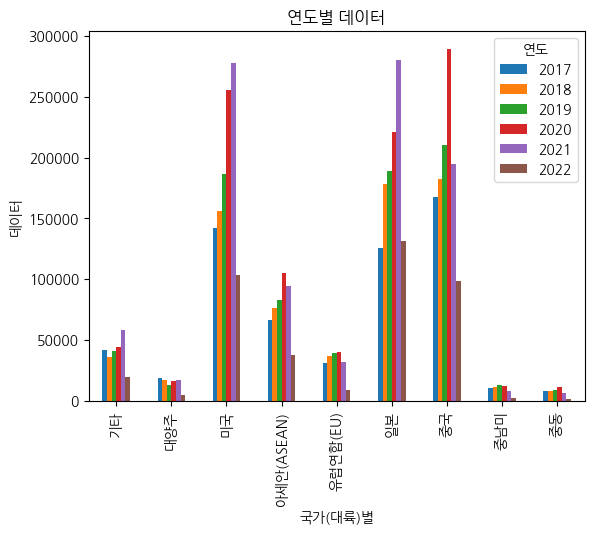

In [ ]:
pt.plot(kind='bar', stacked=False)
plt.title('연도별 데이터')
plt.xlabel('국가(대륙)별')
plt.ylabel('데이터')
plt.legend(title='연도')
plt.show()

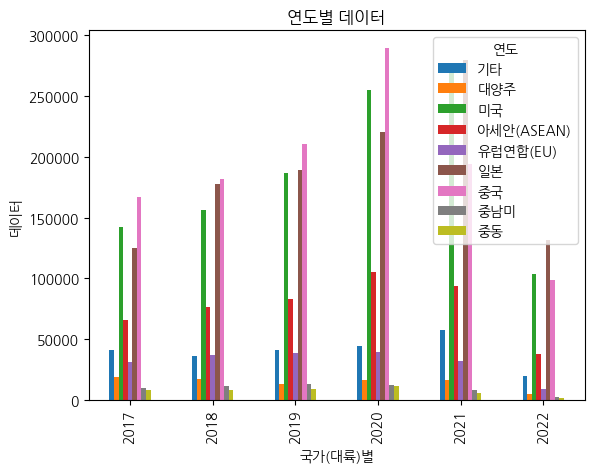

In [ ]:
pt.T.plot(kind='bar', stacked=False)
plt.title('연도별 데이터')
plt.xlabel('국가(대륙)별')
plt.ylabel('데이터')
plt.legend(title='연도')
plt.show()

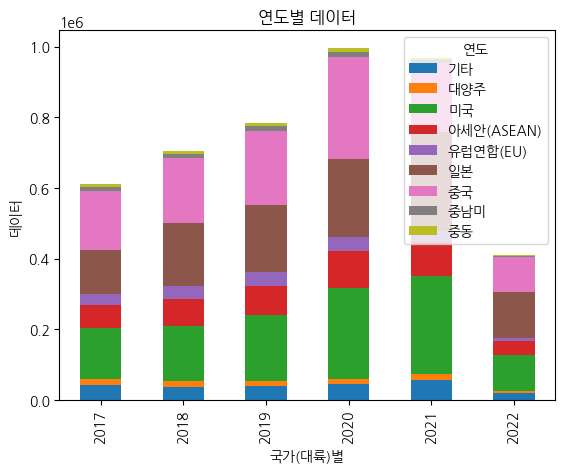

In [ ]:
pt.T.plot(kind='bar', stacked=True)
plt.title('연도별 데이터')
plt.xlabel('국가(대륙)별')
plt.ylabel('데이터')
plt.legend(title='연도')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

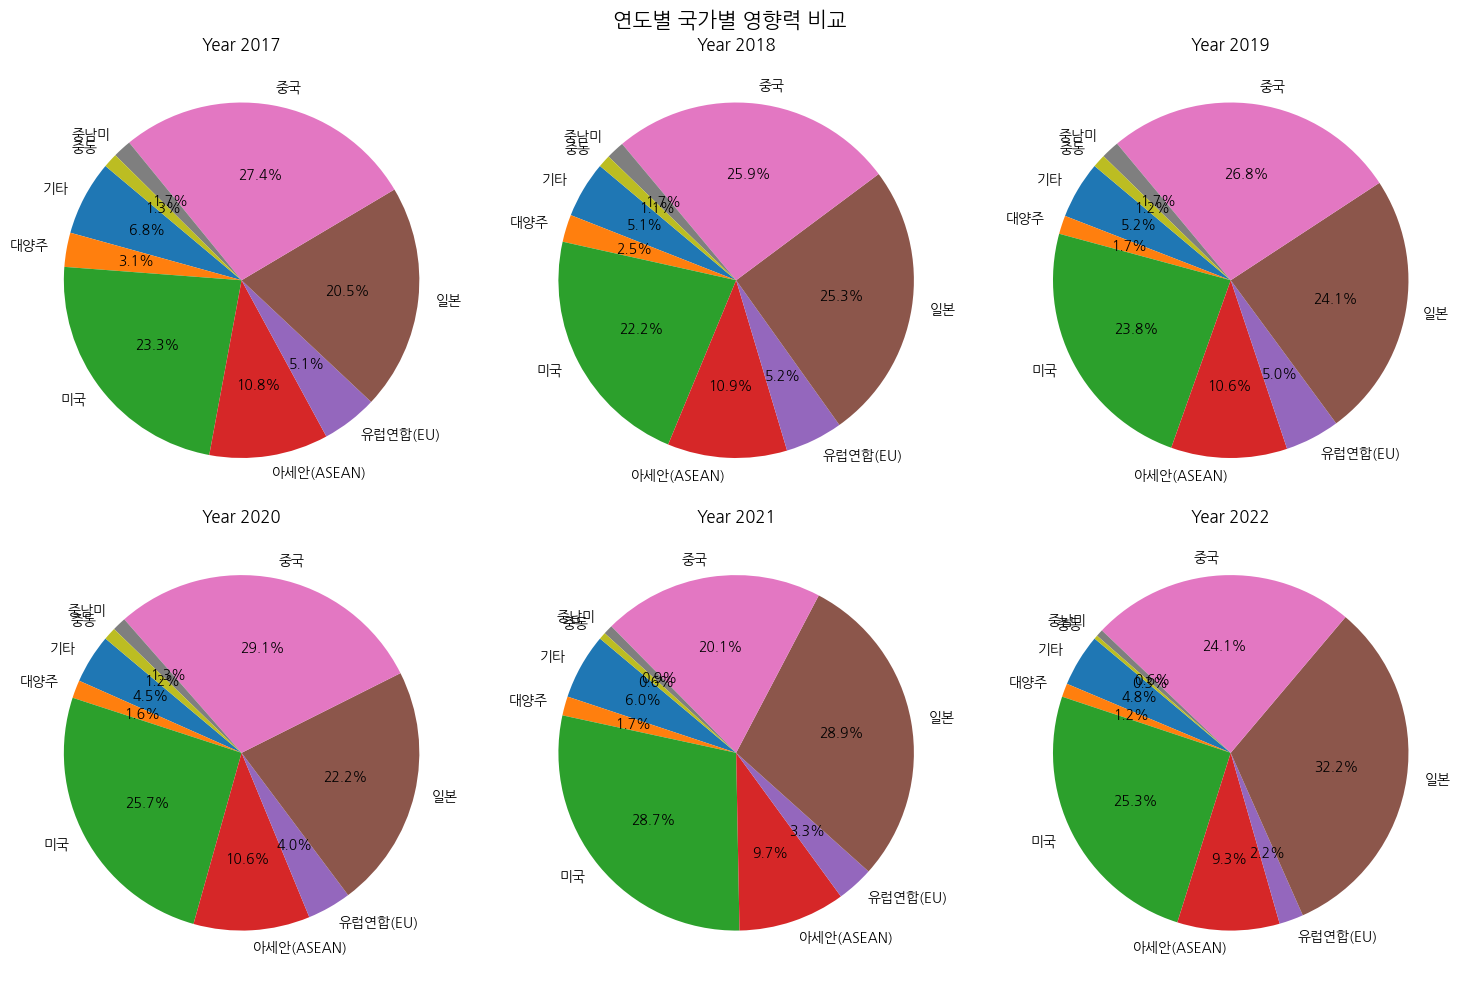

In [ ]:
# 서브플롯에 연도별 파이 그래프 그리기
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2x3 서브플롯 그리기
years = [2017, 2018, 2019, 2020, 2021, 2022]

for i, year in enumerate(years):
    row, col = divmod(i, 3)
    data_year = pt[year]
    labels = data_year.index
    sizes = data_year.values

    axes[row, col].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    axes[row, col].set_title(f'Year {year}')

plt.suptitle('연도별 국가별 영향력 비교', fontsize=15)  # 전체 제목 추가
plt.tight_layout()  # 서브플롯 레이아웃 조정
plt.show

In [ ]:
#@title Q3

 Q3. groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.

2020년은 코로나로 인해 전국민이 어려움을 겪었던 시기입니다. 또, 아마존 등의 해외 온라인 판매가 늘어난 시기이기도 합니다. 이 때, 해외 어느지역에 온라인 판매가 얼마나 되었는지를 groupby() 와 unstack()을 활용해서 합계를 구하고 분석해 주세요! 또 분석한 결과를 보고 어떤 인사이트를 얻었는지도 함께 작성해 주세요!
그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.


<Axes: xlabel='연도'>

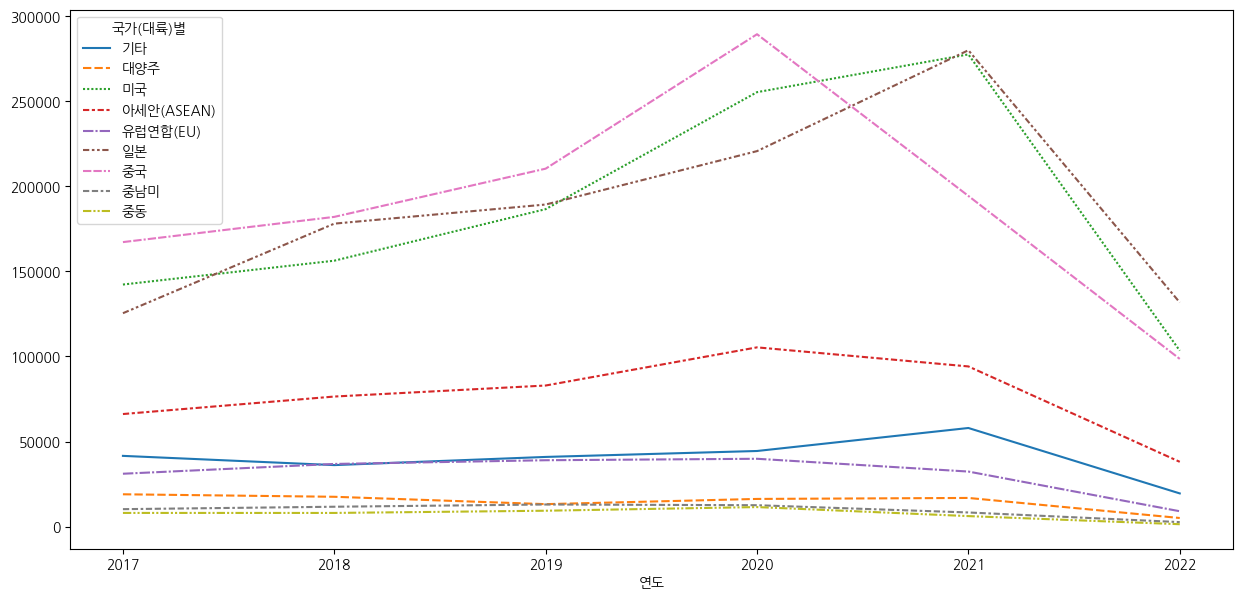

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(pt.T)

# 대부분의 지역에서 판매액이 증가함

In [ ]:
df2002 = df[df['연도']==2020]
data = pd.DataFrame(df2002.groupby('국가(대륙)별')['데이터'].sum())
data

,데이터
국가(대륙)별,
기타,44438
대양주,16255
미국,255384
아세안(ASEAN),105360
유럽연합(EU),39865
일본,220730
중국,289446
중남미,12563
중동,11467


In [ ]:
data_sorted = data.sort_values(by='데이터', ascending=False).reset_index()
data_sorted

,국가(대륙)별,데이터
0,중국,289446
1,미국,255384
2,일본,220730
3,아세안(ASEAN),105360
4,기타,44438
5,유럽연합(EU),39865
6,대양주,16255
7,중남미,12563
8,중동,11467


<Axes: xlabel='국가(대륙)별', ylabel='데이터'>

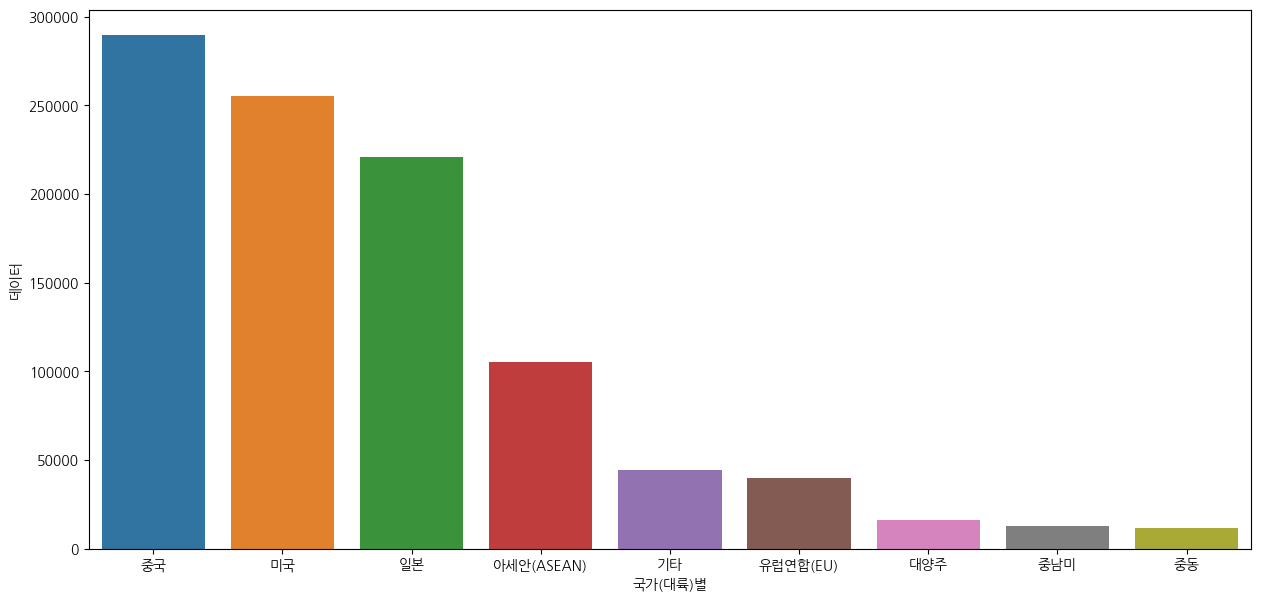

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(data_sorted,x='국가(대륙)별',y='데이터')

In [ ]:
df2002 = df[df['연도']==2020]
stat2002 = pd.pivot_table(df2002, index='국가(대륙)별',columns='분기',values='데이터',aggfunc='sum')
stat2002

분기,1,2,3,4
국가(대륙)별,,,,
기타,17876,8616,9245,8701
대양주,3169,3905,4702,4479
미국,48464,65758,67839,73323
아세안(ASEAN),30028,25367,24977,24988
유럽연합(EU),10730,9204,9751,10180
일본,41300,58390,58925,62115
중국,75423,62109,64367,87547
중남미,3446,2459,3076,3582
중동,3286,2537,2880,2764


<Axes: xlabel='국가(대륙)별'>

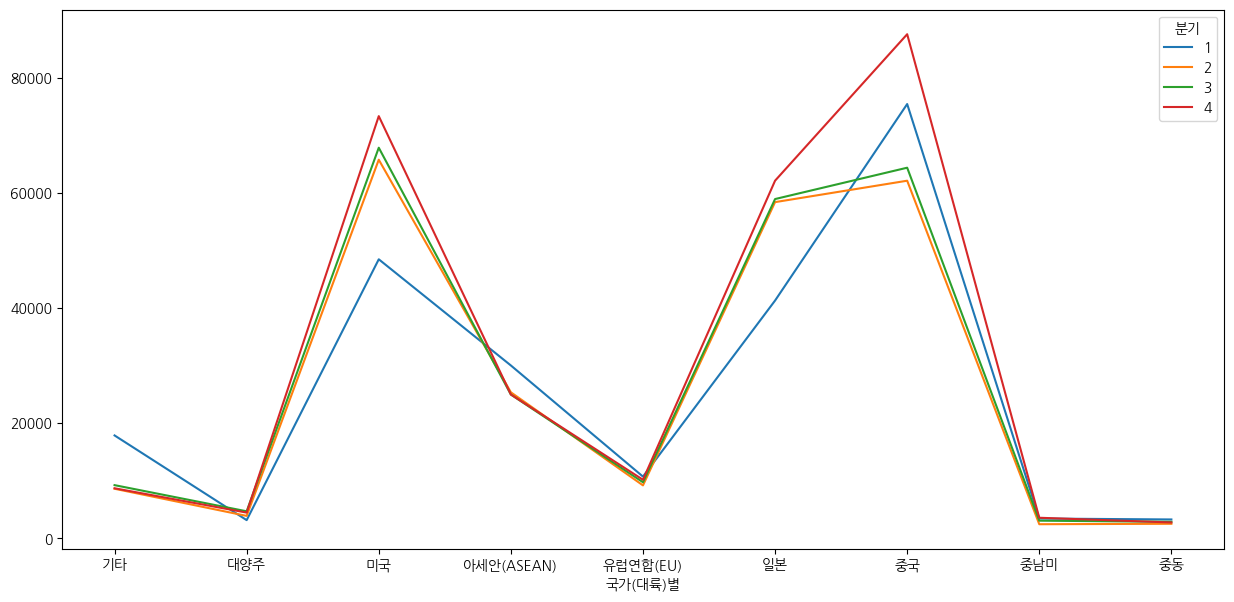

In [ ]:
stat2002.plot(figsize=(15,7))

<Axes: xlabel='분기'>

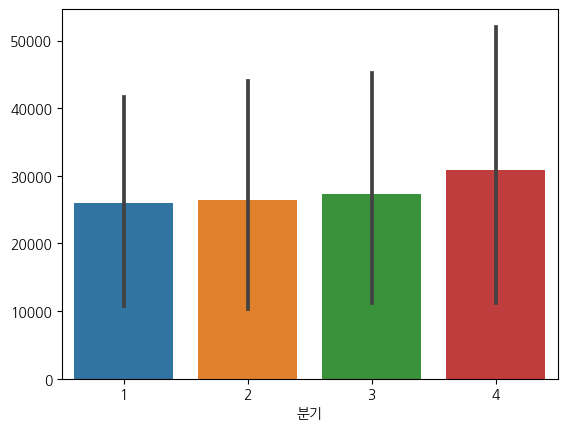

In [ ]:
sns.barplot(stat2002)

In [ ]:
stat2002.reset_index()

분기,국가(대륙)별,1,2,3,4
0,기타,17876,8616,9245,8701
1,대양주,3169,3905,4702,4479
2,미국,48464,65758,67839,73323
3,아세안(ASEAN),30028,25367,24977,24988
4,유럽연합(EU),10730,9204,9751,10180
5,일본,41300,58390,58925,62115
6,중국,75423,62109,64367,87547
7,중남미,3446,2459,3076,3582
8,중동,3286,2537,2880,2764


<ipython-input-31-4bb30141a345>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df2020, x='국가(대륙)별', y='데이터', hue='분기', palette='viridis',ci=False)


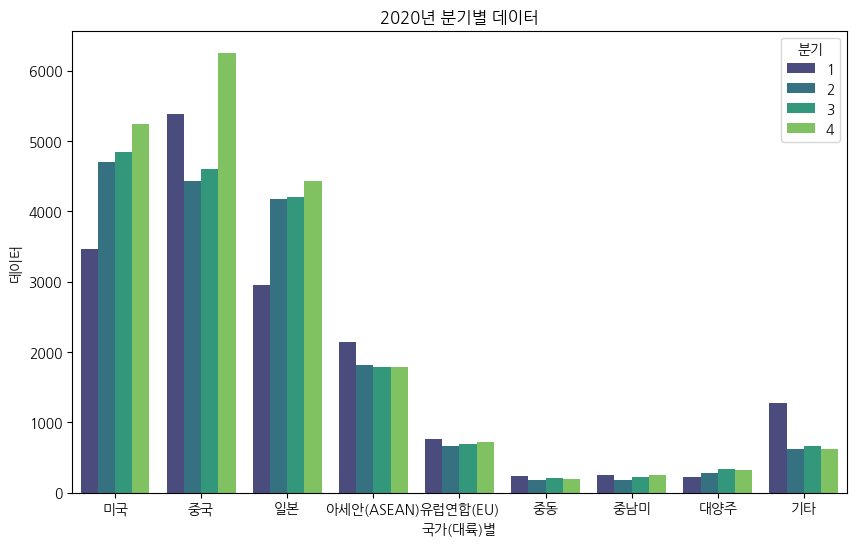

In [ ]:
df2020 = df[df['연도'] == 2020]
stat2020 = pd.pivot_table(df2020, index='국가(대륙)별', columns='분기', values='데이터', aggfunc='sum')

# Seaborn을 사용하여 바 차트 그리기
plt.figure(figsize=(10, 6))
sns.barplot(data=df2020, x='국가(대륙)별', y='데이터', hue='분기', palette='viridis',ci=False)
plt.title('2020년 분기별 데이터')
plt.xlabel('국가(대륙)별')
plt.ylabel('데이터')
plt.show()

<Axes: xlabel='국가(대륙)별'>

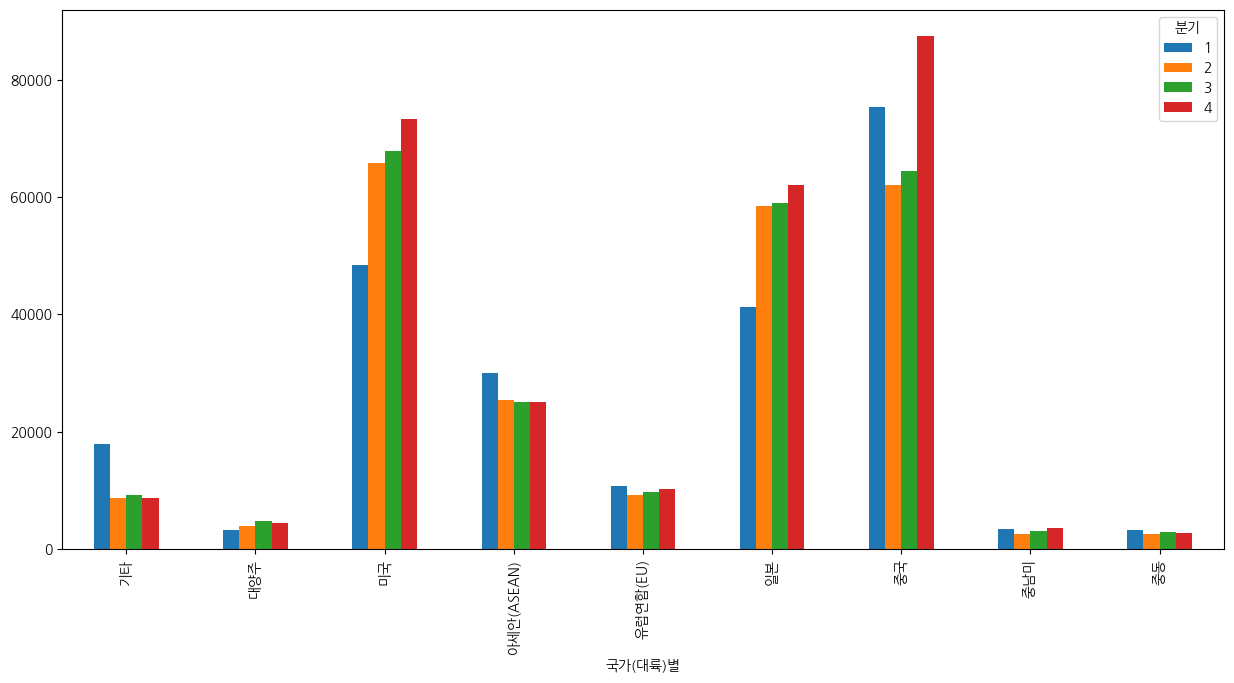

In [ ]:
stat2020.plot(figsize=(15,7),kind='bar')

In [ ]:
#@title Q4.

In [ ]:
df_top3 = df[(df['국가(대륙)별'] == '미국') | (df['국가(대륙)별'] == '중국') | (df['국가(대륙)별'] == '일본')]
df_top3 = df_top3[(df_top3['상품군별'] == "의류 및 패션 관련상품") | (df_top3['상품군별'] == "화장품") | (df_top3['상품군별'] == "음반·비디오·악기")]
df_top3 = df_top3[df_top3['연도'] < 2022]

In [ ]:
df_top3

,국가(대륙)별,상품군별,판매유형별,시점,데이터,연도,분기
110,미국,음반·비디오·악기,면세점 이외,2017.1/4,1922,2017,1
111,미국,음반·비디오·악기,면세점 이외,2017.2/4,1778,2017,2
112,미국,음반·비디오·악기,면세점 이외,2017.3/4,2281,2017,3
113,미국,음반·비디오·악기,면세점 이외,2017.4/4,2647,2017,4
114,미국,음반·비디오·악기,면세점 이외,2018.1/4,2362,2018,1
...,...,...,...,...,...,...,...
807,일본,화장품,면세점 이외,2020.4/4,11994,2020,4
808,일본,화장품,면세점 이외,2021.1/4,12421,2021,1
809,일본,화장품,면세점 이외,2021.2/4,18768,2021,2
810,일본,화장품,면세점 이외,2021.3/4,23380,2021,3


In [ ]:
result = pd.DataFrame(df_top3.groupby(['연도','국가(대륙)별','상품군별'])['데이터'].mean())

<Figure size 1200x700 with 0 Axes>

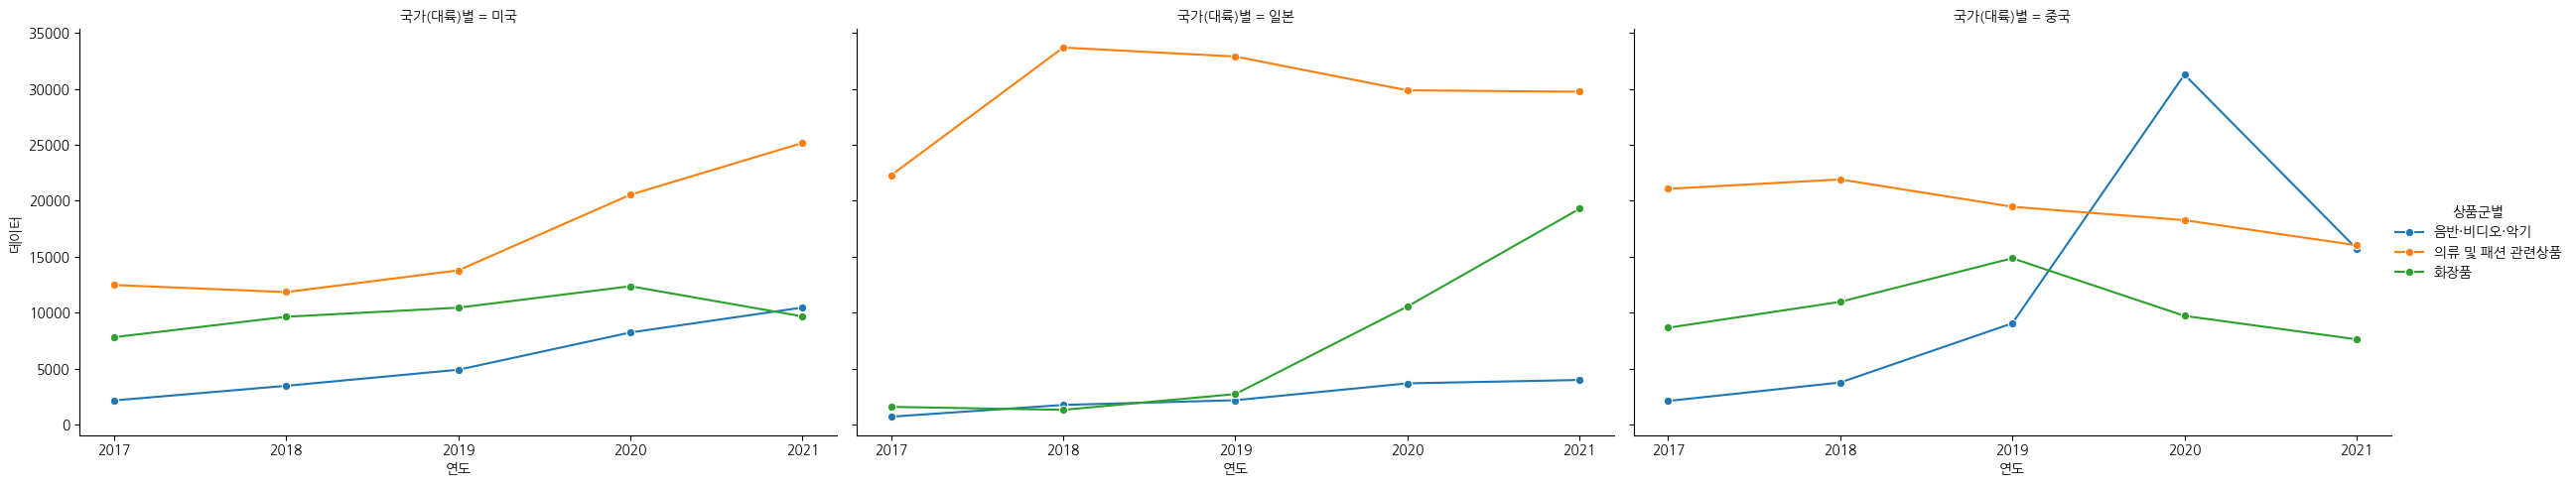

In [ ]:
plt.figure(figsize=(12,7))
g = sns.FacetGrid(result.reset_index(), col="국가(대륙)별", hue="상품군별", col_wrap=3, height=5, aspect=1.5)
g.map(sns.lineplot, "연도", "데이터", marker='o')
g.add_legend(bbox_to_anchor=(1.03, 0.5), loc='center')
g.set_axis_labels("연도", "데이터")
g.set_titles(col_template="국가(대륙)별 = {col_name}")

years = [2017, 2018, 2019, 2020, 2021]
g.set(xticks=years)

# 그래프 표시
plt.tight_layout()
plt.show()

In [ ]:
#@title Q5.

In [ ]:
# data1,2 모두 단위는 (명)
data1 = pd.read_csv('/content/데이터산업의_기술등급별_데이터직무_인력_현황_20231030184633.csv',encoding='utf-8')
data2 = pd.read_csv('/content/데이터산업의_데이터직무별_인력_현황_20231030184551.csv', encoding='utf-8',header=1)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 48 to 155
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   시점         45 non-null     int64 
 1   데이터직무별(1)  45 non-null     object
 2   기술등급별(1)   45 non-null     object
 3   데이터산업 전체   45 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.8+ KB


In [ ]:
data1['데이터산업 전체'] = data1['데이터산업 전체'].astype(int)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   시점                      56 non-null     int64 
 1   데이터직무별(1)               56 non-null     object
 2   전체                      56 non-null     int64 
 3   데이터 처리 및 관리 솔루션 개발·공급업  56 non-null     int64 
 4   데이터 구축 및 컨설팅 서비스업       56 non-null     int64 
 5   데이터 판매 및 제공 서비스업        56 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.8+ KB


In [ ]:
data1.head()

,시점,데이터직무별(1),기술등급별(1),데이터산업 전체,데이터 처리 및 관리 솔루션 개발·공급업,데이터 구축 및 컨설팅 서비스업,데이터 구축·가공 서비스업,데이터 관련 컨설팅 서비스업,데이터 판매 및 제공 서비스업
0,2016,데이터 아키텍트,초급,-,71,-,585,149,47
1,2016,데이터 아키텍트,중급,-,284,-,1852,209,163
2,2016,데이터 아키텍트,고급,-,214,-,776,141,245
3,2016,데이터 개발자,초급,-,1635,-,4870,624,1389
4,2016,데이터 개발자,중급,-,1234,-,4424,886,4058


In [ ]:
data1['데이터 구축 및 컨설팅 서비스업'] = data1['데이터 구축·가공 서비스업'] + data1['데이터 관련 컨설팅 서비스업']
data1 = data1.drop(['데이터 구축·가공 서비스업','데이터 관련 컨설팅 서비스업'],axis=1)

In [ ]:
data1

,시점,데이터직무별(1),기술등급별(1),데이터산업 전체,데이터 처리 및 관리 솔루션 개발·공급업,데이터 구축 및 컨설팅 서비스업,데이터 판매 및 제공 서비스업
0,2016,데이터 아키텍트,초급,-,71,585149,47
1,2016,데이터 아키텍트,중급,-,284,1852209,163
2,2016,데이터 아키텍트,고급,-,214,776141,245
3,2016,데이터 개발자,초급,-,1635,4870624,1389
4,2016,데이터 개발자,중급,-,1234,4424886,4058
...,...,...,...,...,...,...,...
163,2022,데이터 컨설턴트,중급,4056,1203,--,676
164,2022,데이터 컨설턴트,고급,3229,923,--,643
165,2022,데이터 기획자,초급,3333,686,--,2010
166,2022,데이터 기획자,중급,5297,971,--,2999


In [ ]:
data2.head()

,시점,데이터직무별(1),전체,데이터 처리 및 관리 솔루션 개발·공급업,데이터 구축 및 컨설팅 서비스업,데이터 판매 및 제공 서비스업
0,2016,데이터 아키텍트,4736,569,3712,455
1,2016,데이터 개발자,27379,3835,14971,8573
2,2016,데이터 엔지니어,12664,1380,6886,4398
3,2016,데이터 분석가,4477,588,1817,2072
4,2016,데이터베이스관리자,11488,648,3869,6971


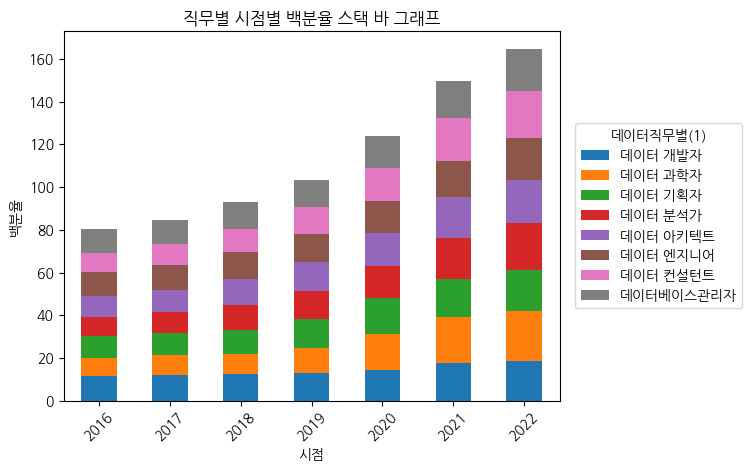

In [ ]:
# 차이 비교 하기 힘
stacked_data = data2.groupby(['데이터직무별(1)', '시점'])['전체'].sum().unstack().T
stacked_data = stacked_data.div(stacked_data.sum(axis=0), axis=1) * 100

# 스택 바 그래프 그리기
stacked_data.plot(kind='bar', stacked=True)

# 그래프 표시
plt.xlabel("시점")
plt.xticks(rotation=45)
plt.ylabel("백분율")
plt.title("직무별 시점별 백분율 스택 바 그래프")
plt.legend(title="데이터직무별(1)",bbox_to_anchor=(1.2,0.5),loc='center')
plt.show()

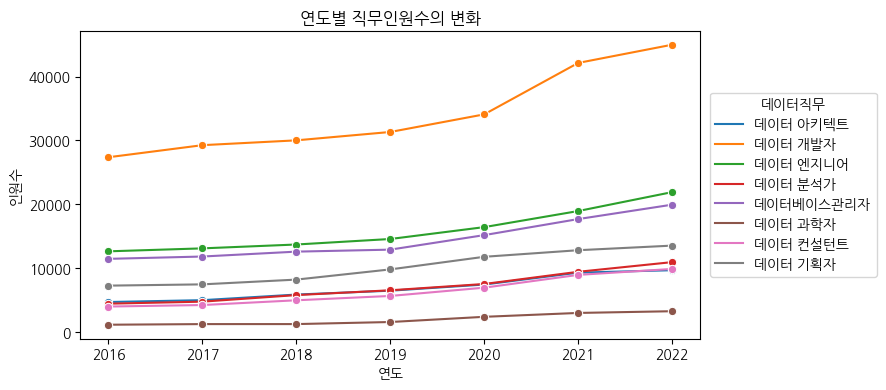

In [ ]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=data2, x='시점', y='전체', hue='데이터직무별(1)',marker='o')

# 그래프 표시
plt.xlabel("연도")
plt.ylabel("인원수")
plt.title("연도별 직무인원수의 변화")
plt.legend(title="데이터직무", bbox_to_anchor=(1.15,0.5),loc='center')
plt.show()

In [ ]:
'''
데이터 직군에서는 연도별로 대부분 비율이 같았으나, 2022년의 경우 데이터 분석가가 데이터 컨설턴트 데이터 아티텍트 인원수를 넘어섰다
데이터 관련 직군 취업을 준비한다면 시장의 파이가 큰 데이터 개발자나 엔지니어 혹은, 최근 증가한 분석가를 준비하면 되는 것일까?
'''

'\n데이터 직군에서는 연도별로 대부분 비율이 같았으나, 2022년의 경우 데이터 분석가가 데이터 컨설턴트 데이터 아티텍트 인원수를 넘어섰다\n데이터 관련 직군 취업을 준비한다면 시장의 파이가 큰 데이터 발자나 엔지니어 혹은, 최근 증가한 분석가를 준비하면 되는 것일까?\n'

In [ ]:
data1.head()

,시점,데이터직무별(1),기술등급별(1),데이터산업 전체,데이터 처리 및 관리 솔루션 개발·공급업,데이터 구축 및 컨설팅 서비스업,데이터 판매 및 제공 서비스업
0,2016,데이터 아키텍트,초급,-,71,585149,47
1,2016,데이터 아키텍트,중급,-,284,1852209,163
2,2016,데이터 아키텍트,고급,-,214,776141,245
3,2016,데이터 개발자,초급,-,1635,4870624,1389
4,2016,데이터 개발자,중급,-,1234,4424886,4058


In [ ]:
data1 = data1[(data1['데이터직무별(1)']=='데이터 아키텍트') | (data1['데이터직무별(1)']=='데이터 개발자') | (data1['데이터직무별(1)']=='데이터 분석가')]

In [ ]:
data1 = data1[data1['시점']>2017]
data1 = data1.iloc[:, 0:4]

In [ ]:
data1.head()

,시점,데이터직무별(1),기술등급별(1),데이터산업 전체
48,2018,데이터 아키텍트,초급,902
49,2018,데이터 아키텍트,중급,2608
50,2018,데이터 아키텍트,고급,2391
51,2018,데이터 개발자,초급,7498
52,2018,데이터 개발자,중급,11900


In [ ]:
data1

,시점,데이터직무별(1),기술등급별(1),데이터산업 전체,데이터 처리 및 관리 솔루션 개발·공급업,데이터 구축 및 컨설팅 서비스업,데이터 판매 및 제공 서비스업
0,2016,데이터 아키텍트,초급,-,71,585149,47
1,2016,데이터 아키텍트,중급,-,284,1852209,163
2,2016,데이터 아키텍트,고급,-,214,776141,245
3,2016,데이터 개발자,초급,-,1635,4870624,1389
4,2016,데이터 개발자,중급,-,1234,4424886,4058
...,...,...,...,...,...,...,...
148,2022,데이터 개발자,중급,17679,2986,--,5397
149,2022,데이터 개발자,고급,14863,3044,--,5425
153,2022,데이터 분석가,초급,2201,319,--,829
154,2022,데이터 분석가,중급,4377,712,--,1612


<Figure size 1500x700 with 0 Axes>

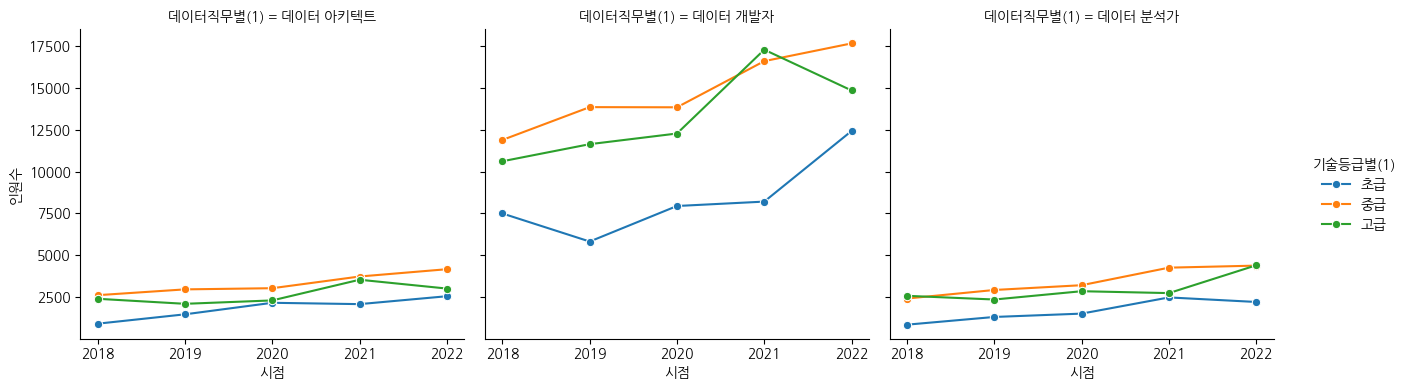

In [ ]:
plt.figure(figsize=(15,7))
g = sns.FacetGrid(data1, col="데이터직무별(1)", hue="기술등급별(1)", col_wrap=3, height=4)
g.map(sns.lineplot, "시점", "데이터산업 전체", marker='o')

# 그래프 표시
g.set_axis_labels("시점", "인원수")
g.set_titles(col_template="데이터직무별(1) = {col_name}")
g.add_legend(title="기술등급별(1)", bbox_to_anchor=(1.05, 0.5), loc='center')

years = [2018, 2019, 2020, 2021, 2022]
g.set(xticks=years)

plt.tight_layout()
plt.show()

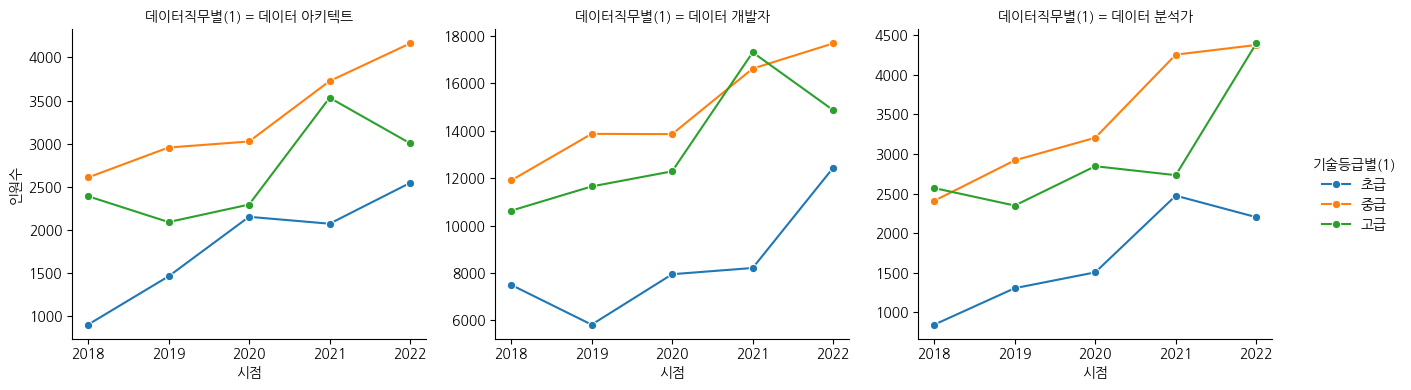

In [ ]:
g = sns.FacetGrid(data1, col="데이터직무별(1)", hue="기술등급별(1)", col_wrap=3, height=4, sharey=False)
g.map(sns.lineplot, "시점", "데이터산업 전체", marker='o')

# 그래프 표시
g.set_axis_labels("시점", "인원수")
g.set_titles(col_template="데이터직무별(1) = {col_name}")
g.add_legend(title="기술등급별(1)", bbox_to_anchor=(1.05, 0.5), loc='center')

years = [2018, 2019, 2020, 2021, 2022]
g.set(xticks=years)

plt.tight_layout()
plt.show()


In [ ]:
'''
데이터 아키텍처 분야의 경우 중급자, 초급자는 2022년 증가, 고급자 감소
데이터 개발자 분야의 경우 중급자, 초급자는 2022년 증가, 고급자 감소
데이터 분석가 분야의 경우 고급자,중급자는 증가, 초급자는 감소...

신입 데분으로 취직하기가 더 어려워 질것 같다..
'''

'\n데이터 아키텍처 분야의 경우 중급자, 초급자는 2022년 증가, 고급자 감소\n데이터 개발자 분야의 경우 중급자, 초급자는 2022년 증가, 고급자 감소\n데이터 분석가 분야의 경우 고급자,중급자는 증가, 초급자는 감소...\n'